In [23]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [24]:
co2 = pd.read_csv(r"../data/CO2.csv")
co2["CO2 cum"] = co2["CO2"].cumsum()
temp = pd.read_csv(r"../data/Temp.csv")

joint = pd.merge(co2, temp, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,CO2,CO2 cum,Temp
0,1850,1.967520e+08,4.769415e+09,-0.417711
1,1851,1.986681e+08,4.968083e+09,-0.233350
2,1852,2.074142e+08,5.175497e+09,-0.229399
3,1853,2.171204e+08,5.392617e+09,-0.270354
4,1854,2.550332e+08,5.647651e+09,-0.291521
...,...,...,...,...
168,2018,3.676694e+10,1.626853e+12,0.762654
169,2019,3.704010e+10,1.663893e+12,0.891073
170,2020,3.500774e+10,1.698901e+12,0.922921
171,2021,3.681654e+10,1.735718e+12,0.761906


In [25]:
co2_array = joint["CO2 cum"].to_numpy().reshape(-1, 1)
temp_array = joint["Temp"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_3 = regr.fit(co2_array, temp_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(co2_array, temp_array)}.")


The model [ y = 7.337481638382288e-13 x + -0.35988060413288325] has score 0.8885093666701108.


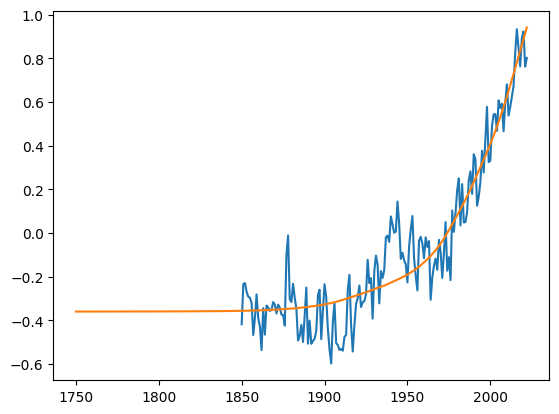

In [26]:
def co2_to_temp(co2):
    co2["CO2 cum"] = co2["CO2"].cumsum()
    predict_array = model_3.predict(np.array(co2["CO2 cum"]).reshape(-1,1)).flatten()

    temp_predict = pd.DataFrame(
        {
            "Year": [t for t in range(1750, co2["Year"].values[-1]+1)],
            "Temp": [h for h in predict_array],
        }
    )

    return temp_predict


# inspect the fit in historical data
co2 = pd.read_csv(r"../data/CO2.csv")
temp_predict = co2_to_temp(co2)
plt.plot(np.asarray(joint["Year"], float), joint["Temp"])
plt.plot(np.asarray(temp_predict["Year"], float), temp_predict["Temp"])
plt.show()